In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/Geetika/RawData.csv')
df2=pd.read_csv('/content/drive/MyDrive/Geetika/RawData1.csv')
print(df1.shape)
print(df2.shape)

(394, 14)
(394, 8)


In [ ]:
df1.head()

,NO,GENDER,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,TOTAL,RESULT
0,1,P,3,2,2,6,6,6,6,6,6,3,46,1
1,2,P,5,2,5,5,3,2,4,2,5,5,38,1
2,3,P,3,2,1,4,3,1,1,3,2,2,22,0
3,4,P,4,3,2,4,5,2,3,3,4,2,32,0
4,5,L,4,2,2,4,2,2,4,3,5,4,32,0


In [ ]:
df2.head()

,No.,Name/Initial,Gender,Age,Class,Smartphone-usage Duration,Social Media Usage,The Most Frequent Access
0,1,DI,0,15,2,4,1,3
1,2,SA,0,13,1,2,1,3
2,3,SY,0,13,1,2,1,2
3,4,YA,0,13,1,2,1,3
4,5,MVFI,1,13,1,4,1,2


In [ ]:
df2=df2.drop('No.', axis=1)
df2=df2.drop('Name/Initial', axis=1)
df1=df1.drop('NO',axis=1)
df1=df1.drop('TOTAL ',axis=1)
df1=df1.drop('GENDER ', axis=1)
exDf=horizontal_concat = pd.concat([df2, df1], axis=1)
exDf.head()

,Gender,Age,Class,Smartphone-usage Duration,Social Media Usage,The Most Frequent Access,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,RESULT
0,0,15,2,4,1,3,3,2,2,6,6,6,6,6,6,3,1
1,0,13,1,2,1,3,5,2,5,5,3,2,4,2,5,5,1
2,0,13,1,2,1,2,3,2,1,4,3,1,1,3,2,2,0
3,0,13,1,2,1,3,4,3,2,4,5,2,3,3,4,2,0
4,1,13,1,4,1,2,4,2,2,4,2,2,4,3,5,4,0


In [ ]:
exDf=exDf.drop('Class', axis=1)
exDf=exDf.drop('Social Media Usage', axis=1)
exDf=exDf.drop('Gender', axis=1)
exDf.head()

,Age,Smartphone-usage Duration,The Most Frequent Access,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,RESULT
0,15,4,3,3,2,2,6,6,6,6,6,6,3,1
1,13,2,3,5,2,5,5,3,2,4,2,5,5,1
2,13,2,2,3,2,1,4,3,1,1,3,2,2,0
3,13,2,3,4,3,2,4,5,2,3,3,4,2,0
4,13,4,2,4,2,2,4,2,2,4,3,5,4,0


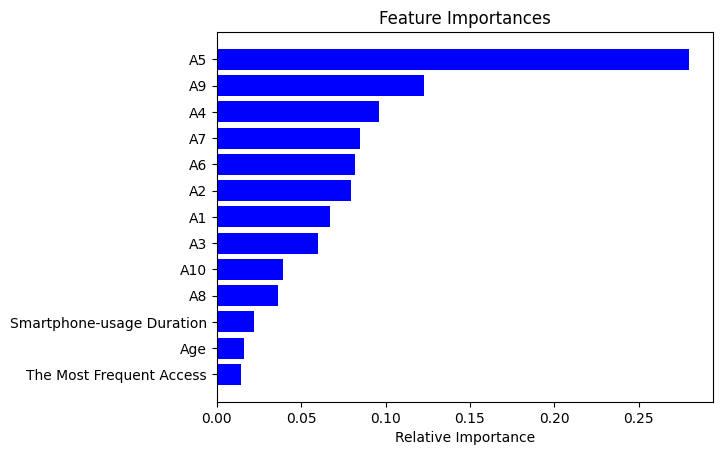

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

model = RandomForestRegressor(random_state=1, max_depth=10)
labels = to_categorical(exDf.RESULT)
exDf=exDf.drop('RESULT', axis=1)
model.fit(exDf,labels)

features = exDf.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(exDf, labels, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7899159663865546


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

newDf=exDf[['A5','A9','A4','A7','A6','A2']]

X_train, X_test, y_train, y_test = train_test_split(newDf, labels, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7983193277310925


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

newDf=exDf[['A5','A9','A4','A7']]

X_train, X_test, y_train, y_test = train_test_split(newDf, labels, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7310924369747899


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = to_categorical(exDf.RESULT)
exDf1=exDf.drop('RESULT', axis=1)

X_train, X_test, y_train, y_test = train_test_split(exDf1, labels, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions =  y_pred
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

AttributeError: 'DataFrame' object has no attribute 'RESULT'

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = to_categorical(exDf.RESULT)
newDf=exDf[['A5','A9','A4','A7','A6','A2']]

X_train, X_test, y_train, y_test = train_test_split(newDf, labels, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions =  y_pred
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

AttributeError: 'DataFrame' object has no attribute 'RESULT'

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = to_categorical(exDf.RESULT)
newDf1=exDf[['A5','A9','A4','A7']]

X_train, X_test, y_train, y_test = train_test_split(newDf1, labels, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions =  y_pred
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

AttributeError: 'DataFrame' object has no attribute 'RESULT'

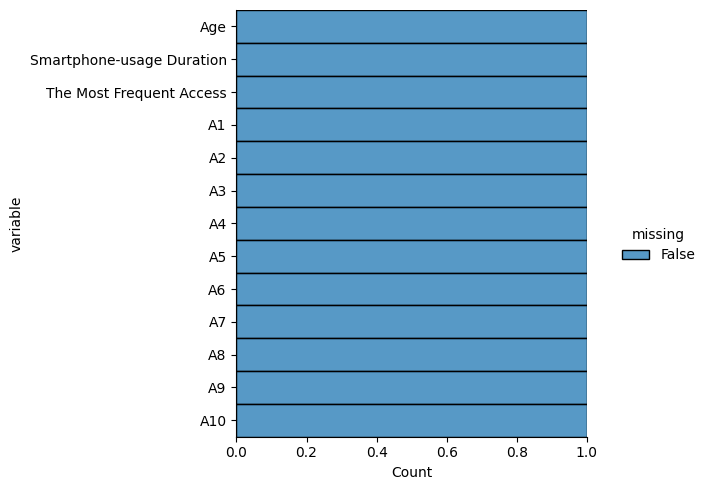

In [ ]:
import seaborn as sns

sns.displot(
    data=exDf.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [ ]:
print(exDf['Gender'].value_counts())

0    271
1    123
Name: Gender, dtype: int64


In [ ]:
print(exDf['Gender'].value_counts()/len(exDf)*100)

0    68.781726
1    31.218274
Name: Gender, dtype: float64


In [ ]:
print(exDf['Age'].value_counts())

13    133
14    131
15     75
12     40
16     11
11      4
Name: Age, dtype: int64


In [ ]:
print(exDf['Age'].value_counts()/len(exDf)*100)

13    33.756345
14    33.248731
15    19.035533
12    10.152284
16     2.791878
11     1.015228
Name: Age, dtype: float64


In [ ]:
print(exDf['Class'].value_counts())

1    181
2    130
3     83
Name: Class, dtype: int64


In [ ]:
print(exDf['Class'].value_counts()/len(exDf)*100)

1    45.939086
2    32.994924
3    21.065990
Name: Class, dtype: float64


In [ ]:
print(exDf['Smartphone-usage Duration'].value_counts())

2    164
3    109
4     64
1     57
Name: Smartphone-usage Duration, dtype: int64


In [ ]:
print(exDf['Smartphone-usage Duration'].value_counts()/len(exDf)*100)

2    41.624365
3    27.664975
4    16.243655
1    14.467005
Name: Smartphone-usage Duration, dtype: float64


In [ ]:
print(exDf['Social Media Usage'].value_counts())

1    386
0      8
Name: Social Media Usage, dtype: int64


In [ ]:
print(exDf['Social Media Usage'].value_counts()/len(exDf)*100)

1    97.969543
0     2.030457
Name: Social Media Usage, dtype: float64


In [ ]:
print(exDf['The Most Frequent Access'].value_counts())

3    249
2     64
1     41
5     38
4      2
Name: The Most Frequent Access, dtype: int64


In [ ]:
print(exDf['The Most Frequent Access'].value_counts()/len(exDf)*100)

3    63.197970
2    16.243655
1    10.406091
5     9.644670
4     0.507614
Name: The Most Frequent Access, dtype: float64


In [ ]:
print(exDf['A10'].value_counts()/len(exDf)*100)

5    26.395939
4    20.558376
3    18.781726
2    18.274112
6     8.375635
1     7.614213
Name: A10, dtype: float64


In [ ]:
print(exDf['A10'].value_counts())

A10
5    104
4     81
3     74
2     72
6     33
1     30
Name: count, dtype: int64


In [ ]:
key1=exDf['A10'].value_counts()
s1=key1.index
s2=key1.values
print(s1)
print(s2)

Int64Index([5, 4, 3, 2, 6, 1], dtype='int64')
[104  81  74  72  33  30]


Text(0, 0.5, 'Count')

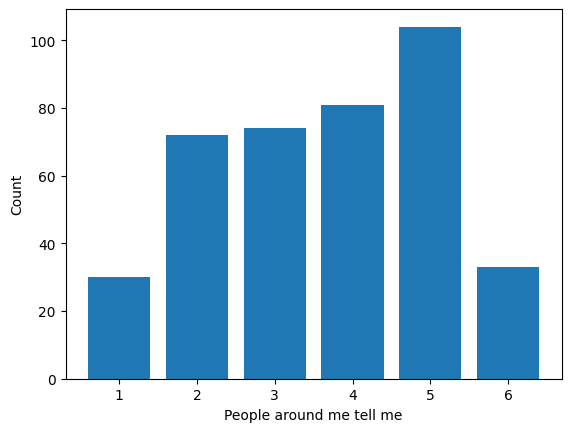

In [ ]:
import matplotlib.pyplot as plt

plt.bar(s1, s2)
plt.xlabel('People around me tell me')
plt.ylabel('Count')

In [ ]:
exDf.head()

,Gender,Age,Class,Smartphone-usage Duration,Social Media Usage,The Most Frequent Access,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,TOTAL,RESULT
0,0,15,2,4,1,3,3,2,2,6,6,6,6,6,6,3,46,1
1,0,13,1,2,1,3,5,2,5,5,3,2,4,2,5,5,38,1
2,0,13,1,2,1,2,3,2,1,4,3,1,1,3,2,2,22,0
3,0,13,1,2,1,3,4,3,2,4,5,2,3,3,4,2,32,0
4,1,13,1,4,1,2,4,2,2,4,2,2,4,3,5,4,32,0


In [ ]:
print(exDf['Gender'].unique())
print(exDf['Age'].unique())
print(exDf['Class'].unique())
print(exDf['Smartphone-usage Duration'].unique())
print(exDf['Social Media Usage'].unique())
print(exDf['The Most Frequent Access'].unique())

[0 1]
[15 13 12 14 16 11]
[2 1 3]
[4 2 1 3]
[1 0]
[3 2 4 5 1]


Text(0, 0.5, '% Count')

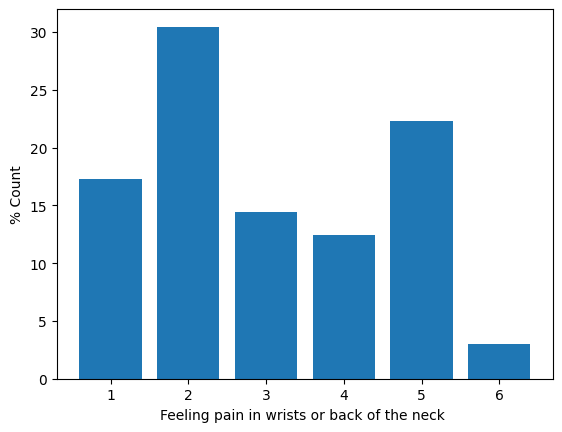

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A3'].unique()
data=pd.value_counts((exDf['A3']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('Feeling pain in wrists or back of the neck ')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

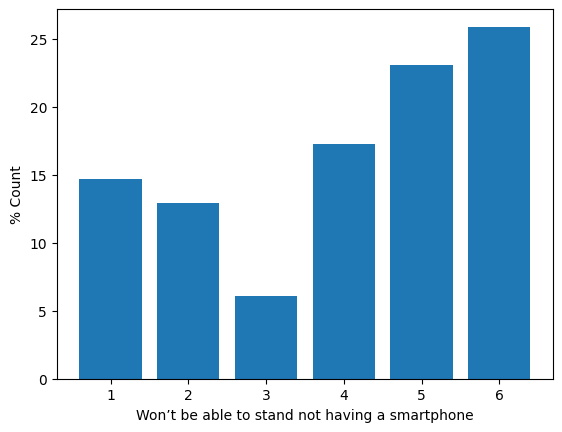

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A4'].unique()
data=pd.value_counts((exDf['A4']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('Won’t be able to stand not having a smartphone')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

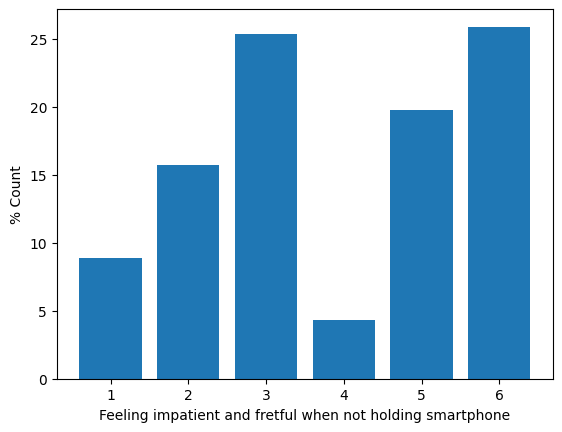

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A5'].unique()
data=pd.value_counts((exDf['A5']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('Feeling impatient and fretful when not holding smartphone')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

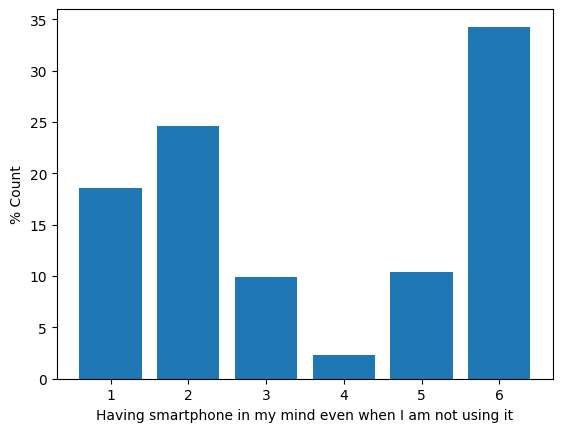

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A6'].unique()
data=pd.value_counts((exDf['A6']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('Having smartphone in my mind even when I am not using it')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

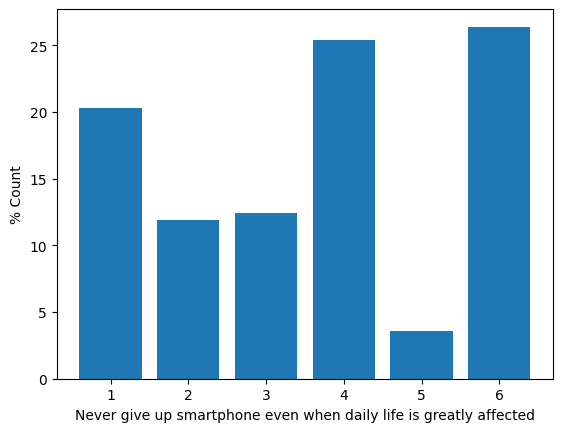

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A7'].unique()
data=pd.value_counts((exDf['A7']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('Never give up smartphone even when daily life is greatly affected')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

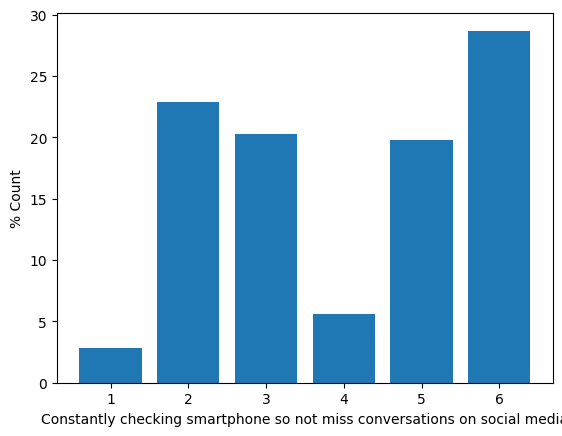

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A8'].unique()
data=pd.value_counts((exDf['A8']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('Constantly checking smartphone so not miss conversations on social media')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

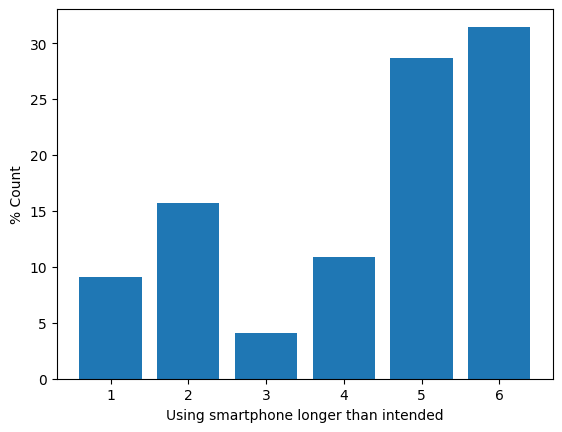

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A9'].unique()
data=pd.value_counts((exDf['A9']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('Using smartphone longer than intended')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

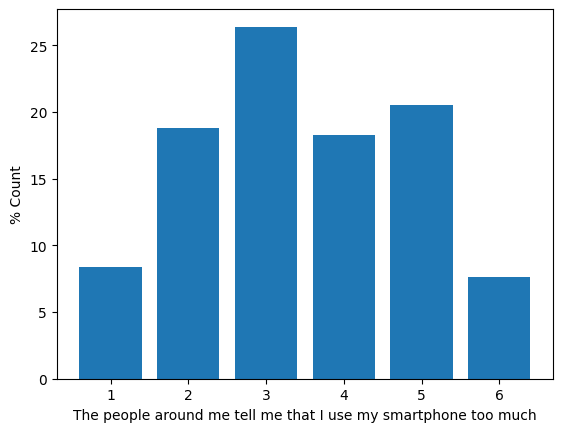

In [ ]:
import matplotlib.pyplot as plt
key=exDf['A10'].unique()
data=pd.value_counts((exDf['A10']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('The people around me tell me that I use my smartphone too much')
plt.ylabel('% Count')

Text(0, 0.5, '% Count')

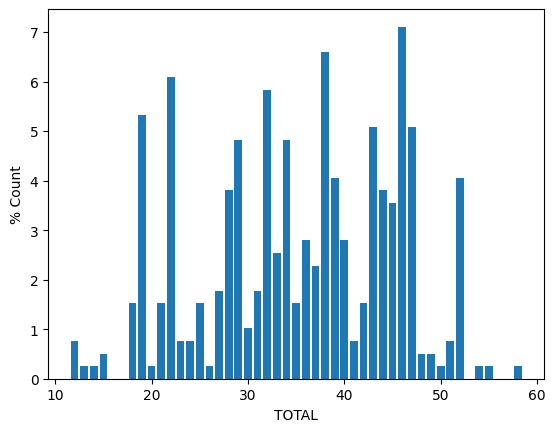

In [ ]:
import matplotlib.pyplot as plt
key=exDf['TOTAL '].unique()
data=pd.value_counts((exDf['TOTAL ']))/len(exDf)*100
plt.bar(key,data)
plt.xlabel('TOTAL')
plt.ylabel('% Count')

In [ ]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,TOTAL,RESULT
0,3,2,2,6,6,6,6,6,6,3,46,1
1,5,2,5,5,3,2,4,2,5,5,38,1
2,3,2,1,4,3,1,1,3,2,2,22,0
3,4,3,2,4,5,2,3,3,4,2,32,0
4,4,2,2,4,2,2,4,3,5,4,32,0


In [ ]:
df2.head()

,Gender,Age,Class,Smartphone-usage Duration,Social Media Usage,The Most Frequent Access
0,0,15,2,4,1,3
1,0,13,1,2,1,3
2,0,13,1,2,1,2
3,0,13,1,2,1,3
4,1,13,1,4,1,2


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from keras.utils import to_categorical


model = RandomForestRegressor(random_state=1, max_depth=10)
labels = to_categorical(df1.RESULT)
model.fit(df2,labels)

RandomForestRegressor(max_depth=10, random_state=1)

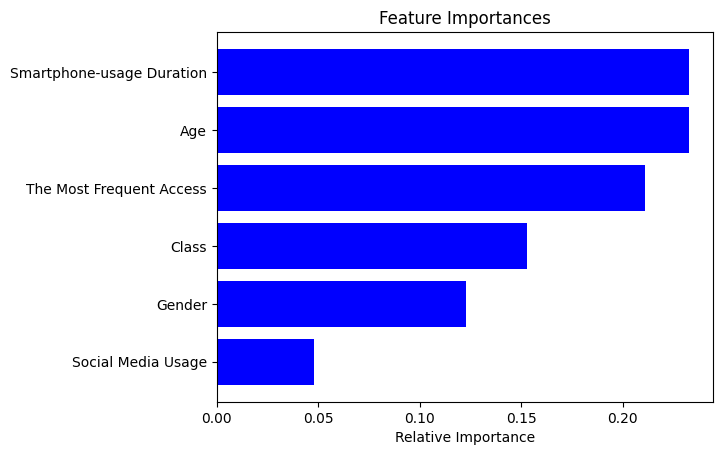

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
finalX=df1.drop('RESULT',axis=1)
finalX.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,3,2,2,6,6,6,6,6,6,3
1,5,2,5,5,3,2,4,2,5,5
2,3,2,1,4,3,1,1,3,2,2
3,4,3,2,4,5,2,3,3,4,2
4,4,2,2,4,2,2,4,3,5,4


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics

y=exDf['RESULT']
X = df2[["Age", "Smartphone-usage Duration","The Most Frequent Access"]]
exf=horizontal_concat = pd.concat([X, finalX], axis=1)
X=exf
X.head()

,Age,Smartphone-usage Duration,The Most Frequent Access,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,15,4,3,3,2,2,6,6,6,6,6,6,3
1,13,2,3,5,2,5,5,3,2,4,2,5,5
2,13,2,2,3,2,1,4,3,1,1,3,2,2
3,13,2,3,4,3,2,4,5,2,3,3,4,2
4,13,4,2,4,2,2,4,2,2,4,3,5,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8151260504201681


In [ ]:
from sklearn import tree


text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 2.50
|   |--- feature_11 <= 4.50
|   |   |--- feature_6 <= 3.50
|   |   |   |--- feature_10 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  4.50
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  3.50
|   |   |   |--- feature_5 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  3.50
|   |   |   |   |--- class: 1
|   |--- feature_11 >  4.50
|   |   |--- feature_10 <= 2.50
|   |   |   |--- feature_3 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  4.50
|   |   |   |   |--- class: 1
|   |   |--- feature_10 >  2.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- class: 1
|--- feature_7 >  2.50
|   |--- feature_11 <= 2.50
|   |   |--- feature_7 <= 4.50
|   |   |   |--- feature_4 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  3.50
|   |   |   |   |--- class: 1
|   |   |--- feature_7 >  4.50
|   |   |   |--- feature_5 <= 

[Text(0.5, 0.9, 'A5 <= 2.5\ngini = 0.463\nsamples = 275\nvalue = [100, 175]'),
 Text(0.25, 0.7, 'A9 <= 4.5\ngini = 0.385\nsamples = 96\nvalue = [71, 25]'),
 Text(0.125, 0.5, 'A4 <= 3.5\ngini = 0.253\nsamples = 74\nvalue = [63, 11]'),
 Text(0.0625, 0.3, 'A8 <= 4.5\ngini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.09375, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1875, 0.3, 'A3 <= 3.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.15625, 0.1, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.21875, 0.1, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.375, 0.5, 'A8 <= 2.5\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.3125, 0.3, 'A1 <= 4.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.28125, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.34375, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4375, 0.3, 'A2 <= 1.5\ngini = 0.26\nsamples = 13\nv

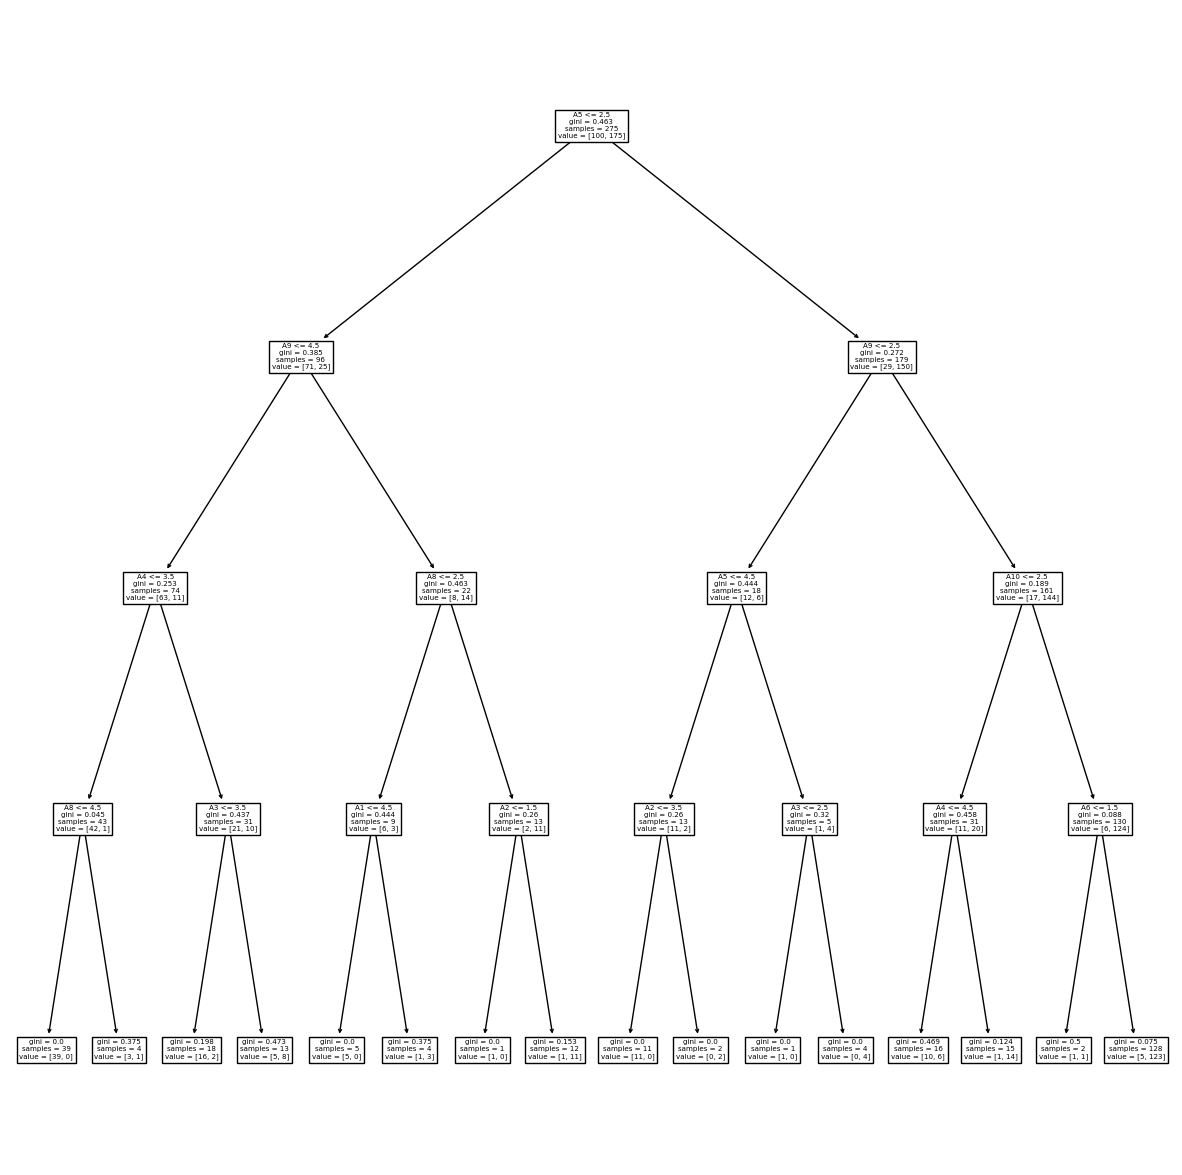

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf, feature_names = X.columns)